In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression,SGDRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
x=6*np.random.rand(200,1)-3
y=0.8*x**2 + 0.9*x+np.random.rand(200,1)

In [12]:
y

array([[ 0.54424462],
       [ 0.46308054],
       [ 5.91686336],
       [ 0.75139235],
       [ 1.49499686],
       [ 0.10710164],
       [ 0.43035072],
       [ 6.86380324],
       [ 0.25736375],
       [ 0.85902466],
       [ 0.12245266],
       [ 1.72197456],
       [ 0.26591301],
       [ 2.70001892],
       [ 1.28596622],
       [10.23546293],
       [-0.0545923 ],
       [ 1.19445161],
       [ 4.23864248],
       [ 8.57078167],
       [-0.07918478],
       [ 0.7626627 ],
       [ 4.62377916],
       [ 1.09457233],
       [ 1.04730263],
       [ 4.26073575],
       [ 0.71704738],
       [ 0.58809633],
       [ 4.8227097 ],
       [ 0.69789289],
       [ 3.51673288],
       [ 1.27752257],
       [ 0.99297323],
       [ 1.88951605],
       [ 0.78122494],
       [ 1.00691218],
       [ 1.38211178],
       [ 3.22574111],
       [ 4.84328132],
       [ 2.97426755],
       [ 0.18947801],
       [ 0.37015031],
       [ 2.96909212],
       [ 3.87253332],
       [ 1.84542048],
       [ 3

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
x_train.shape

(160, 1)

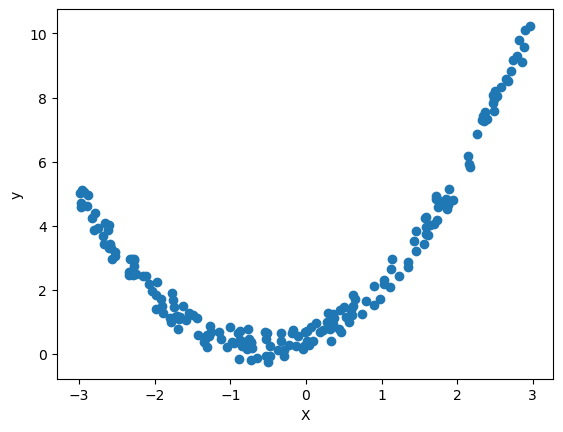

In [19]:
plt.scatter(x, y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [20]:
lr=LinearRegression()
lr.fit(x_train,y_train)
res=lr.predict(x_test)

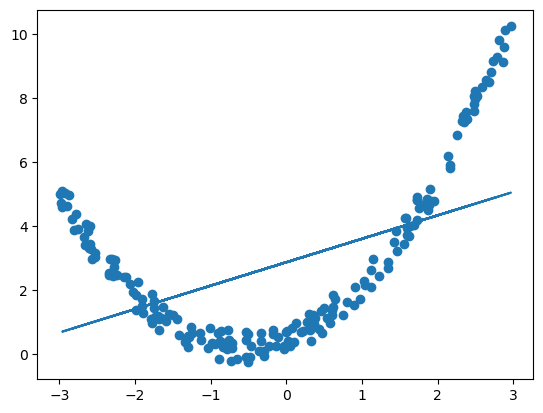

In [23]:
plt.plot(x_test,res)
plt.scatter(x,y)
plt.show()

In [24]:
r2_score(y_test,res)

0.3660389106479829

This is all that i have done by the help of linear_model now we will do this by polynomial regression

In [117]:
poly=PolynomialFeatures(degree=8,include_bias=True)

In [118]:
x_train_tf=poly.fit_transform(x_train)
x_test_tf=poly.transform(x_test)

In [119]:
x_train_tf

array([[ 1.00000000e+00, -1.90272491e+00,  3.62036208e+00, ...,
         4.74521641e+01, -9.02884147e+01,  1.71794016e+02],
       [ 1.00000000e+00, -2.11386589e+00,  4.46842899e+00, ...,
         8.92204853e+01, -1.88600140e+02,  3.98675403e+02],
       [ 1.00000000e+00,  1.85695525e+00,  3.44828279e+00, ...,
         4.10023384e+01,  7.61395075e+01,  1.41387658e+02],
       ...,
       [ 1.00000000e+00,  2.47599107e+00,  6.13053176e+00, ...,
         2.30406348e+02,  5.70484059e+02,  1.41251343e+03],
       [ 1.00000000e+00,  1.34368728e+00,  1.80549551e+00, ...,
         5.88557959e+00,  7.90837844e+00,  1.06263875e+01],
       [ 1.00000000e+00, -2.97970282e+00,  8.87862892e+00, ...,
         6.99902774e+02, -2.08550227e+03,  6.21417701e+03]])

In [120]:
lr=LinearRegression()
lr.fit(x_train_tf,y_train)

LinearRegression()

In [121]:
result=lr.predict(x_test_tf)

In [122]:
r2_score(y_test,result)

0.9905965875563159

In [123]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

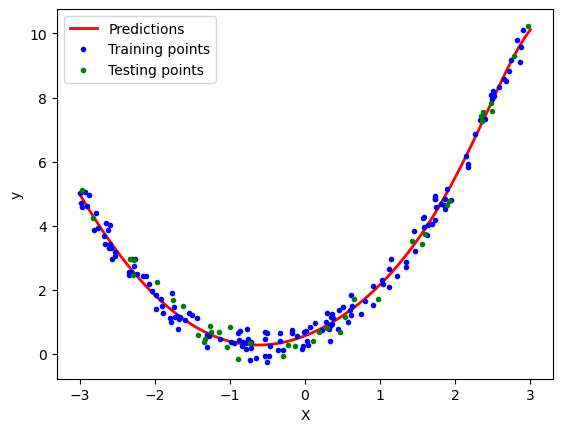

In [124]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()